In [2833]:
import kagglehub
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2834]:
# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)
file = "Life Expectancy Data.csv"

Path to dataset files: /Users/nathanlonghurst/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1


In [2835]:
data = pd.read_csv(path + "/" + file)

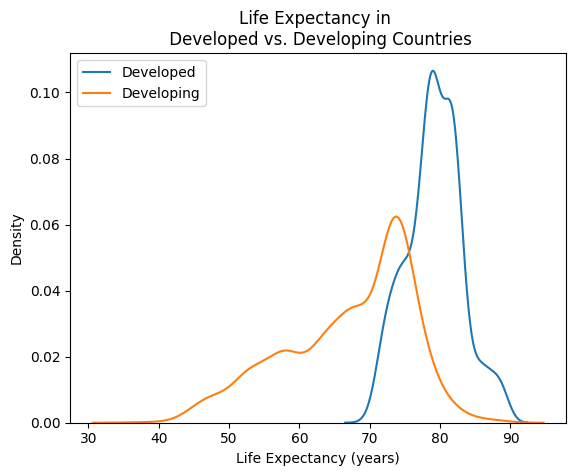

In [2836]:
developing_countries = data[data["Status"] == "Developing"]
developed_countries = data[data["Status"] == "Developed"]
bins = np.arange(30, 90 + 5, 5)

sns.kdeplot(developed_countries["Life expectancy "], label="Developed")
sns.kdeplot(developing_countries["Life expectancy "], label="Developing")
plt.title("Life Expectancy in \n Developed vs. Developing Countries")
plt.xlabel("Life Expectancy (years)")
plt.legend()
plt.show()

### Features
- Alcohol Comsumption: per capita consumption (15+) in litres
- Percentage Expenditure: Expenditure on health as a percentage of Gross Domestic Product Per Capita
- Hepatitis B: Immunization coverage (as a percent)
- Measles: Cases per 1000 people
- BMI: Average BMI
- Polio: immunization coverage among 1-year-olds (percentage)
- Total Expenditure: percentage of government spending on health
- Diptheria: immunization coverage among 1-year-olds (percentage)
- HIV/AIDS: Deaths per 1000 live births due to HIV/AIDS
- GDP: GDP per capita
- Population: of the country
- Thinness 10-19 years: The percentage of children and adolescents aged 10-19 years who are classified as "thin" or underweight based on their Body Mass Index (BMI)
- Thinness 5-9 years: The percentage of children and adolescents aged 5-9 years who are classified as "thin" or underweight based on their Body Mass Index (BMI)
- Income Composition: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Average number of years of education

### Future Features to consider
- Adult Mortality: Mortality rate per 1000
- Infant Deaths: Per 1000 population
- Under-five Deaths: number of under five deaths per 1000 population

In [2837]:
def clean_feature_step(data, country, feature_col_name, minimum, maximum, range_max, print_year):
    updated_data = data
    cleaned = True
    data_in_question = data[data["Country"] == country][feature_col_name]
    data_max = data_in_question.max()
    data_min = data_in_question.min()
    if data_max > maximum:
        if print_year:
            year_idx = data_in_question.idxmax()
            year = data.iloc[year_idx, "Year"]
            print(f"max value out of range for {country} in {year}: {data_max}")
        else:
            print(f"max value out of range for {country}: {data_max}")
    elif data_min < minimum:
        if print_year:
            year_idx = data_in_question.idxmin()
            year = data.iloc[year_idx, "Year"]
            print(f"min value out of range for {country} in {year}: {data_min}")
        else:
            print(f"min value out of range for {country}: {data_min}")
    elif data_max - data_min > range_max:
        # Find the minimum value's index and multiply it
        updated_val = data_min*10
        if updated_val > maximum:
            if print_year:
                year_idx = data_in_question.idxmin()
                year = data.iloc[year_idx, "Year"]
                print(f"attempted to update {data_min} to {updated_val} for {country} in {year}")
            else:
                print(f"attempted to update {data_min} to {updated_val} for {country}")
        else:
            if print_year:
                min_idx = updated_data[updated_data["Country"] == country][feature_col_name].idxmin()  # Get index of min value
                updated_data.loc[min_idx, feature_col_name] *= 10
                year = data.iloc[min_idx, "Year"]
                print(f"found lower value of {data_min} and updated to {updated_val} for {country} in {year}")
                cleaned = False
            else:
                min_idx = updated_data[updated_data["Country"] == country][feature_col_name].idxmin()  # Get index of min value
                updated_data.loc[min_idx, feature_col_name] *= 10
                print(f"found lower value of {data_min} and updated to {updated_val} for {country}")
                cleaned = False

    return updated_data, cleaned

def clean_feature(data, feature_col_name, minimum, maximum, range_max, print_year=False):
    for country in data["Country"].unique():
        cleaned = False
        while not cleaned:
            data, cleaned = clean_feature_step(data, country, feature_col_name, minimum, maximum, range_max, print_year=print_year)
    return data

In [2838]:
data = clean_feature(data, "Adult Mortality", 0, 1000, 500)

found lower value of 3.0 and updated to 30.0 for Botswana
found lower value of 30.0 and updated to 300.0 for Botswana
found lower value of 34.0 and updated to 340.0 for Eritrea
found lower value of 3.0 and updated to 30.0 for Haiti
found lower value of 24.0 and updated to 240.0 for Haiti
found lower value of 28.0 and updated to 280.0 for Haiti
found lower value of 29.0 and updated to 290.0 for Haiti
found lower value of 30.0 and updated to 300.0 for Haiti
found lower value of 32.0 and updated to 320.0 for Haiti
found lower value of 33.0 and updated to 330.0 for Haiti
found lower value of 35.0 and updated to 350.0 for Haiti
found lower value of 35.0 and updated to 350.0 for Haiti
found lower value of 52.0 and updated to 520.0 for Lesotho
found lower value of 42.0 and updated to 420.0 for Malawi
found lower value of 66.0 and updated to 660.0 for Malawi
found lower value of 67.0 and updated to 670.0 for Malawi
found lower value of 6.0 and updated to 60.0 for Swaziland
found lower value of

In [2839]:
data = clean_feature(data, "infant deaths", 0, 600, 500)
# India has ALL of their data over 900 for infant mortality rate. This is crazy so we will divide by 10 because that seems to be realistic
data.loc[data['Country'] == 'India', 'infant deaths'] = data.loc[data['Country'] == 'India', 'infant deaths'] // 10
# data = clean_feature(data, "infant deaths", 0, 600, 500) # good it actually cleaned

max value out of range for India: 1800


In [2840]:
# data[data["Country"] == "South Sudan"]
# South Sudan has a ton of nans so we will drop this country
data = data[data['Country'] != 'South Sudan']

### For observing alcohol, consumption, we will need to drop NaN values

In [2841]:
# For observing alcohol, consumption, we will need to drop NaN values
# data = data[data["Alcohol"].isna() == False]

### I don't understand the percentage expenditure

In [2842]:
data = clean_feature(data, "percentage expenditure", 0, 100, 100)

max value out of range for Albania: 437.0621
max value out of range for Algeria: 555.9260834
max value out of range for Angola: 256.1225243
max value out of range for Antigua and Barbuda: 2422.999774
max value out of range for Argentina: 1504.329462
max value out of range for Armenia: 295.6087143
max value out of range for Australia: 11734.85381
max value out of range for Austria: 8350.193523
max value out of range for Azerbaijan: 306.1824313
max value out of range for Bahrain: 2211.215778
max value out of range for Barbados: 1641.30981
max value out of range for Belarus: 1147.1114
max value out of range for Belgium: 7191.051507
max value out of range for Belize: 670.0920883
max value out of range for Benin: 110.2633619
max value out of range for Bhutan: 302.667579
max value out of range for Bosnia and Herzegovina: 732.8662491
max value out of range for Botswana: 668.9562854
max value out of range for Brazil: 1111.191325
max value out of range for Brunei Darussalam: 3192.634413
max val

In [2843]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


Here is the Hepatitis B info for Algeria
32    95.0
33    95.0
34    95.0
35    95.0
36    95.0
37    95.0
38    94.0
39    91.0
40     9.0
41     8.0
42    83.0
43    81.0
44     NaN
45     NaN
46     NaN
47     NaN

In [2844]:
data = clean_feature(data, "Hepatitis B", 0, 100, 85)

found lower value of 8.0 and updated to 80.0 for Algeria
found lower value of 9.0 and updated to 90.0 for Algeria
found lower value of 5.0 and updated to 50.0 for Azerbaijan
found lower value of 5.0 and updated to 50.0 for Azerbaijan
found lower value of 8.0 and updated to 80.0 for Azerbaijan
found lower value of 9.0 and updated to 90.0 for Bahamas
found lower value of 5.0 and updated to 50.0 for Bangladesh
attempted to update 11.0 to 110.0 for Bangladesh
found lower value of 7.0 and updated to 70.0 for Belarus
found lower value of 6.0 and updated to 60.0 for Belgium
found lower value of 6.0 and updated to 60.0 for Belgium
found lower value of 6.0 and updated to 60.0 for Belgium
found lower value of 8.0 and updated to 80.0 for Bolivia (Plurinational State of)
found lower value of 9.0 and updated to 90.0 for Botswana
found lower value of 4.0 and updated to 40.0 for Cabo Verde
found lower value of 9.0 and updated to 90.0 for Cabo Verde
found lower value of 9.0 and updated to 90.0 for Chi

In [2845]:
data[data["Country"] == "Israel"]["Measles "]

1266     80
1267      6
1268     50
1269    211
1270     70
1271     23
1272      5
1273    931
1274    539
1275      9
1276      2
1277    116
1278    124
1279      2
1280     19
1281     36
Name: Measles , dtype: int64

In [2846]:
# The measles data had tons of countries with more cases than 1000 per 1000... so yeah I'm just not trusting it
data = data.drop(columns="Measles ")

In [2847]:
data[data["Country"] == "Belgium"][" BMI "]

240    63.7
241    63.4
242    63.0
243    62.6
244    62.3
245    61.9
246    61.6
247    61.3
248     6.9
249     6.6
250     6.2
251    59.8
252    59.4
253    59.0
254    58.5
255    58.1
Name:  BMI , dtype: float64

In [2848]:
data = clean_feature(data, " BMI ", 1, 100, 50)

found lower value of 5.8 and updated to 58.0 for Albania
found lower value of 5.8 and updated to 58.0 for Algeria
found lower value of 6.4 and updated to 64.0 for Argentina
found lower value of 6.3 and updated to 63.0 for Australia
found lower value of 6.9 and updated to 69.0 for Australia
found lower value of 5.1 and updated to 51.0 for Austria
found lower value of 5.6 and updated to 56.0 for Austria
found lower value of 6.1 and updated to 61.0 for Bahamas
found lower value of 6.7 and updated to 67.0 for Bahamas
found lower value of 6.1 and updated to 61.0 for Bahrain
found lower value of 6.8 and updated to 68.0 for Bahrain
found lower value of 6.5 and updated to 65.0 for Belarus
found lower value of 6.2 and updated to 62.0 for Belgium
found lower value of 6.6 and updated to 66.0 for Belgium
found lower value of 6.9 and updated to 69.0 for Belgium
found lower value of 5.5 and updated to 55.0 for Bosnia and Herzegovina
found lower value of 5.3 and updated to 53.0 for Brazil
found lower

In [2849]:
data = clean_feature(data, "under-five deaths ", 0, 1000, 500)

max value out of range for India: 2500


In [2850]:
data[data["Country"] == "India"]["under-five deaths "]
# India has a crazy amount of under five deaths. I don't trust it
data = data[data["Country"] != "India"]

In [2851]:
data = clean_feature(data, "Polio", 0, 100, 70)

found lower value of 3.0 and updated to 30.0 for Angola
found lower value of 4.0 and updated to 40.0 for Angola
found lower value of 4.0 and updated to 40.0 for Angola
found lower value of 7.0 and updated to 70.0 for Angola
found lower value of 9.0 and updated to 90.0 for Armenia
found lower value of 9.0 and updated to 90.0 for Australia
found lower value of 8.0 and updated to 80.0 for Azerbaijan
found lower value of 8.0 and updated to 80.0 for Azerbaijan
found lower value of 9.0 and updated to 90.0 for Bangladesh
found lower value of 9.0 and updated to 90.0 for Barbados
found lower value of 9.0 and updated to 90.0 for Barbados
found lower value of 9.0 and updated to 90.0 for Belarus
found lower value of 8.0 and updated to 80.0 for Benin
found lower value of 8.0 and updated to 80.0 for Benin
found lower value of 9.0 and updated to 90.0 for Bhutan
found lower value of 9.0 and updated to 90.0 for Bolivia (Plurinational State of)
found lower value of 9.0 and updated to 90.0 for Bosnia and

In [2852]:
data = clean_feature(data, "Polio", 0, 100, 70)

In [2853]:
data = clean_feature(data, "Total expenditure", 0, 100, 50)

In [2854]:
data = clean_feature(data, "Diphtheria ", 0, 100, 50)

found lower value of 5.0 and updated to 50.0 for Afghanistan
found lower value of 4.0 and updated to 40.0 for Angola
found lower value of 4.0 and updated to 40.0 for Angola
found lower value of 6.0 and updated to 60.0 for Angola
found lower value of 9.0 and updated to 90.0 for Armenia
found lower value of 9.0 and updated to 90.0 for Australia
found lower value of 5.0 and updated to 50.0 for Belarus
found lower value of 7.0 and updated to 70.0 for Benin
found lower value of 8.0 and updated to 80.0 for Benin
found lower value of 8.0 and updated to 80.0 for Bosnia and Herzegovina
found lower value of 9.0 and updated to 90.0 for Bosnia and Herzegovina
found lower value of 9.0 and updated to 90.0 for Burkina Faso
found lower value of 8.0 and updated to 80.0 for Burundi
found lower value of 8.0 and updated to 80.0 for Côte d'Ivoire
found lower value of 9.0 and updated to 90.0 for Cabo Verde
found lower value of 9.0 and updated to 90.0 for Cabo Verde
found lower value of 9.0 and updated to 90

In [2855]:
data = clean_feature(data, " HIV/AIDS", 0, 1000, 200)

In [2856]:
data = data[data["Country"] != "Luxembourg"]

In [2857]:
data[data["Country"] == "Norway"]["GDP"]

1910     7455.24654
1911      975.49856
1912     1291.43500
1913    11563.72700
1914     1574.98610
1915    87646.75346
1916      817.77681
1917     9688.59610
1918    85128.65759
1919    74114.69715
1920    66775.39440
1921     5757.26916
1922     5111.65445
1923     4361.15380
1924    38549.58934
1925    38146.71539
Name: GDP, dtype: float64

In [2858]:
data = clean_feature(data, "GDP", 0, 120000, 50000)

found lower value of 281.81763 and updated to 2818.1763 for Australia
found lower value of 2169.921 and updated to 21699.21 for Australia
found lower value of 2818.1763 and updated to 28181.763 for Australia
found lower value of 3416.71483 and updated to 34167.1483 for Australia
found lower value of 3472.37977 and updated to 34723.7977 for Australia
found lower value of 4991.98289 and updated to 49919.8289 for Australia
found lower value of 443.99361 and updated to 4439.9361 for Austria
found lower value of 554.71532 and updated to 5547.153200000001 for Austria
found lower value of 544.43376 and updated to 5444.3376 for Canada
found lower value of 3743.55917 and updated to 37435.5917 for Denmark
found lower value of 3751.64946 and updated to 37516.4946 for Denmark
found lower value of 4458.7764 and updated to 44587.763999999996 for Denmark
found lower value of 5226.99311 and updated to 52269.9311 for Denmark
found lower value of 5314.64416 and updated to 53146.4416 for Denmark
found lo

In [2859]:
data = clean_feature(data, "GDP", 0, 120000, 25000)

attempted to update 19517.84168 to 195178.4168 for Australia
found lower value of 3212.9355 and updated to 32129.355 for Austria
found lower value of 4439.9361 and updated to 44399.361 for Austria
found lower value of 5547.153200000001 and updated to 55471.53200000001 for Austria
attempted to update 24489.73553 to 244897.35530000002 for Austria
found lower value of 2327.4591 and updated to 23274.591 for Belgium
found lower value of 2552.3328 and updated to 25523.328 for Belgium
found lower value of 3743.95693 and updated to 37439.569299999996 for Belgium
found lower value of 4356.875 and updated to 43568.75 for Belgium
found lower value of 4438.23741 and updated to 44382.3741 for Belgium
found lower value of 4443.83131 and updated to 44438.3131 for Belgium
found lower value of 4474.5717 and updated to 44745.717000000004 for Belgium
found lower value of 4488.5615 and updated to 44885.615 for Belgium
found lower value of 4651.38647 and updated to 46513.864700000006 for Belgium
found lowe

In [2860]:
data.loc[1913, "GDP"] /= 10
data[data["Country"] == "Norway"]["GDP"]

1910    74552.46540
1911    97549.85600
1912    12914.35000
1913    11563.72700
1914    15749.86100
1915    87646.75346
1916    81777.68100
1917    96885.96100
1918    85128.65759
1919    74114.69715
1920    66775.39440
1921    57572.69160
1922    51116.54450
1923    43611.53800
1924    38549.58934
1925    38146.71539
Name: GDP, dtype: float64

In [2861]:
data = data.drop(columns="Population")

In [2862]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [2863]:
data = clean_feature(data, " thinness  1-19 years", 0, 100, 50)

In [2864]:
data[data["Country"] == "Chad"][" thinness 5-9 years"]

528     8.4
529     8.5
530     8.7
531     8.9
532     9.1
533     9.3
534     9.5
535     9.7
536     1.0
537     1.2
538     1.4
539     1.6
540     1.8
541    11.0
542    11.2
543    11.4
Name:  thinness 5-9 years, dtype: float64

In [2865]:
data = clean_feature(data, " thinness 5-9 years", 0, 100, 15)

found lower value of 2.2 and updated to 22.0 for Afghanistan
found lower value of 2.4 and updated to 24.0 for Afghanistan
found lower value of 2.5 and updated to 25.0 for Afghanistan
found lower value of 2.1 and updated to 21.0 for Bangladesh
found lower value of 2.3 and updated to 23.0 for Bangladesh
found lower value of 2.5 and updated to 25.0 for Bangladesh
found lower value of 2.7 and updated to 27.0 for Bangladesh
found lower value of 2.9 and updated to 29.0 for Bangladesh
found lower value of 2.0 and updated to 20.0 for Pakistan
found lower value of 2.2 and updated to 22.0 for Pakistan
found lower value of 2.4 and updated to 24.0 for Pakistan
found lower value of 2.7 and updated to 27.0 for Pakistan
found lower value of 2.9 and updated to 29.0 for Pakistan
found lower value of 1.7 and updated to 17.0 for South Africa


In [2866]:
data = clean_feature(data, "Income composition of resources", 0, 100, 50)